# Logistic Regression(不带正则化)


## 1. 数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ex2data1.txt",header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
df.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


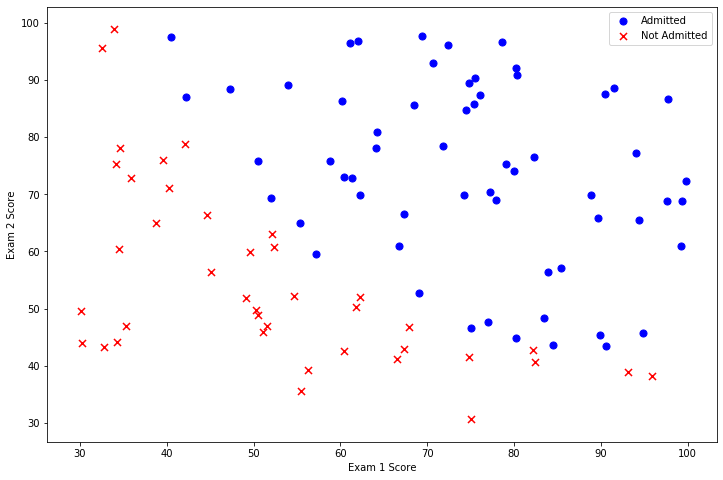

In [3]:
positive = df[df['Admitted'].isin([1])]
negative = df[df['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

## 2. 分离x,y; 计算cost

In [4]:
def get_x(df):
    '''
    将x分离出来，并为x拼上一列为1的向量
    '''
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df],axis=1)
    return np.array(data.iloc[:,:-1].values)

def get_y(df):
    cols = df.shape[1]
    return np.array(df.iloc[:,cols-1:cols])

def normalize_feature(df):
    return df.apply(lambda colcum : (colcum - colcum.mean())/colcum.std())

### sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

$J\left( \theta  \right)= - \frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [5]:
def sigmoid(z):
    #return 1 / (1 + np.exp(-z))
    return .5 * (1 + np.tanh(.5 * z))

In [6]:
def costFunction(theta,x,y):
    theta = np.matrix(theta)
    X = np.matrix(x)
    y = np.matrix(y)
    inner_sum = np.multiply(y,np.log(sigmoid(X*theta.T))) + np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return -np.sum(inner_sum)/len(X)

In [7]:
x = get_x(df)
y = get_y(df)
print(x.shape, y.shape,np.matrix(y).shape)

(100, 3) (100, 1) (100, 1)


In [8]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [9]:
cost = costFunction(theta,x,y)
cost

0.6931471805599453

## 3. 求解
### 梯度下降法求解
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [10]:
def gradientDecent(theta,x,y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    nums = theta.shape[1]
    temp_theta = np.zeros(nums)
    
    error = sigmoid(x * theta.T) - y 
    for i in range(nums):
        temp_theta[i] = np.sum(np.multiply(error , x[:,i])) / len(x) 
        
    return temp_theta

# (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [11]:
x = get_x(df)
y = get_y(df)
theta = np.zeros(3)
gradientDecent(theta,x,y,)
#np.matrix(theta)

array([ -0.1       , -12.00921659, -11.26284221])

In [12]:
import scipy.optimize as opt

In [13]:
result = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradientDecent, args=(x, y))
result

(array([-25.16131862,   0.20623159,   0.20147149]), 36, 0)

In [14]:
theta = result[0]
costFunction(theta,x,y)
np.matrix(theta).shape

(1, 3)

In [15]:
def predict(theta, x):
    theta = np.matrix(theta)
    probability = sigmoid(x * theta.T)
    #return [1 if p >= 0.5 else 0 for p in probability]
    return np.where(probability>=0.5,1,0)

In [16]:
# 正确率
predictions = predict(theta, x)
predictions
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


## 4.寻找决策边界
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

Text(0, 0.5, 'Exam 2 Score')

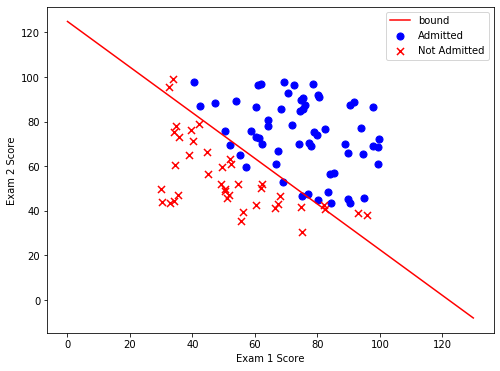

In [17]:
# 画出决策边界
x = np.arange(130, step=0.1)
exam2 = -(theta[0] + x * theta[1] ) / theta[2]
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, exam2, 'r', label='bound')

positive = df[df['Admitted'].isin([1])]
negative = df[df['Admitted'].isin([0])]
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# 正则化的逻辑回归

## 1.数据可视化

In [18]:
df = pd.read_csv("ex2data2.txt",header=None, names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0, 0.5, 'test2')

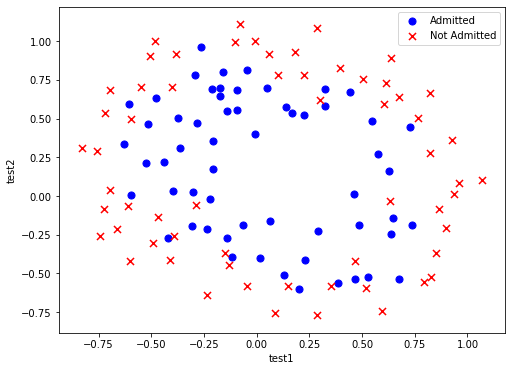

In [19]:
positive = df[df['accepted'].isin([1])]
negative = df[df['accepted'].isin([0])]
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('test1')
ax.set_ylabel('test2')

In [20]:
def get_x_mapping(df:pd.DataFrame,degree:int):
    df_map = pd.DataFrame()
    x1 = df['test1']
    x2 = df['test2']
    for i in range(0, degree+1):
        for j in range(0, i+1):
            df_map['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
    return df_map

In [21]:
get_x_mapping(df,6)

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.699560,0.002628,0.035864,0.489384,1.347453e-04,0.001839,0.025089,0.342354,...,0.000900,1.227829e-02,1.675424e-01,1.815630e-08,2.477505e-07,3.380660e-06,4.613055e-05,6.294709e-04,8.589398e-03,1.172060e-01
1,1.0,-0.092742,0.684940,0.008601,-0.063523,0.469143,-7.976812e-04,0.005891,-0.043509,0.321335,...,0.002764,-2.041205e-02,1.507518e-01,6.362953e-07,-4.699318e-06,3.470651e-05,-2.563226e-04,1.893054e-03,-1.398103e-02,1.032560e-01
2,1.0,-0.213710,0.692250,0.045672,-0.147941,0.479210,-9.760555e-03,0.031616,-0.102412,0.331733,...,0.015151,-4.907685e-02,1.589699e-01,9.526844e-05,-3.085938e-04,9.995978e-04,-3.237900e-03,1.048821e-02,-3.397345e-02,1.100469e-01
3,1.0,-0.375000,0.502190,0.140625,-0.188321,0.252195,-5.273438e-02,0.070620,-0.094573,0.126650,...,0.017810,-2.385083e-02,3.194040e-02,2.780914e-03,-3.724126e-03,4.987251e-03,-6.678793e-03,8.944062e-03,-1.197765e-02,1.604015e-02
4,1.0,-0.513250,0.465640,0.263426,-0.238990,0.216821,-1.352032e-01,0.122661,-0.111283,0.100960,...,0.026596,-2.412849e-02,2.189028e-02,1.827990e-02,-1.658422e-02,1.504584e-02,-1.365016e-02,1.238395e-02,-1.123519e-02,1.019299e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1.0,-0.720620,0.538740,0.519293,-0.388227,0.290241,-3.742131e-01,0.279764,-0.209153,0.156364,...,0.081199,-6.070482e-02,4.538330e-02,1.400354e-01,-1.046913e-01,7.826790e-02,-5.851357e-02,4.374511e-02,-3.270412e-02,2.444980e-02
114,1.0,-0.593890,0.494880,0.352705,-0.293904,0.244906,-2.094682e-01,0.174547,-0.145447,0.121199,...,0.042748,-3.562096e-02,2.968243e-02,4.387691e-02,-3.656200e-02,3.046659e-02,-2.538737e-02,2.115493e-02,-1.762810e-02,1.468924e-02
115,1.0,-0.484450,0.999270,0.234692,-0.484096,0.998541,-1.136964e-01,0.234520,-0.483743,0.997812,...,0.234178,-4.830370e-01,9.963553e-01,1.292688e-02,-2.666414e-02,5.499985e-02,-1.134476e-01,2.340073e-01,-4.826843e-01,9.956280e-01
116,1.0,-0.006336,0.999270,0.000040,-0.006332,0.998541,-2.544062e-07,0.000040,-0.006327,0.997812,...,0.000040,-6.317918e-03,9.963553e-01,6.472253e-14,-1.020695e-11,1.609667e-09,-2.538495e-07,4.003286e-05,-6.313306e-03,9.956280e-01


## 2.regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [22]:
def costFunction_regularized(theta,x,y,learn_rate):
    theta = np.matrix(theta)
    X = np.matrix(x)
    y = np.matrix(y)
    y_predict = sigmoid(X*theta.T)
    inner_sum = np.multiply(y,np.log(y_predict)) + np.multiply((1-y),np.log(1-y_predict))
    regular = learn_rate / 2 /len(X) * np.sum(np.multiply(theta[:,1:],theta[:,1:]))
    return -np.sum(inner_sum)/len(X) + regular

In [23]:
x2 = np.array(get_x_mapping(df,6).values)
y2 = get_y(df)
theta2 = np.zeros(x2.shape[1])
print(x2.shape,y2.shape,theta2.shape)

(118, 28) (118, 1) (28,)


In [24]:
learn_rate = 1
costFunction_regularized(theta2,x2,y2,learn_rate)

0.6931471805599454

## 3.求解
### 梯度下降
如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：

Repeat until convergence{

 ${\theta}_{0}:={\theta}_{0}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}}$
 
 ${\theta}_{j}:={\theta}_{0}-a{[{\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} + \frac{\lambda}{m}{\theta}_{j}}]}$
 }



In [25]:
def gradientDecent_regular(theta,x,y,learn_rate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    nums = theta.shape[1]
    temp_theta = np.zeros(nums)
    
    error = sigmoid(x * theta.T) - y 
    
    for i in range(nums):
        if i==0:
            temp_theta[i] = np.sum(np.multiply(error , x[:,i])) / len(x) 
        else:
            temp_theta[i] = np.sum(np.multiply(error , x[:,i])) / len(x) + learn_rate/len(x)* theta[:,i]
    return temp_theta

In [26]:
x2 = np.array(get_x_mapping(df,6).values)
y2 = get_y(df)
theta2 = np.zeros(x2.shape[1])
learn_rate = 1
gradientDecent_regular(theta2,x2,y2,learn_rate)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [27]:
result2 = opt.fmin_tnc(func=costFunction_regularized, x0=theta2, fprime=gradientDecent_regular, args=(x2, y2, learn_rate))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
        -1.45817009, -0.05098418, -0.61558553, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603298, -0.04466178, -0.27778951, -0.29539513,
        -0.45645982, -1.04319155,  0.02779373, -0.29244871,  0.0155576 ,
        -0.32742406, -0.1438915 , -0.92467487]), 32, 1)

In [29]:
theta = result2[0]
theta

array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
       -1.45817009, -0.05098418, -0.61558553, -0.27469165, -1.19271298,
       -0.2421784 , -0.20603298, -0.04466178, -0.27778951, -0.29539513,
       -0.45645982, -1.04319155,  0.02779373, -0.29244871,  0.0155576 ,
       -0.32742406, -0.1438915 , -0.92467487])

In [31]:
y_predict = predict(theta,x2)

In [32]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y2,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



In [37]:
acc = [ 1 if (real==0 and predict==0) or (real==1 and predict==1) else 0 for (real,predict) in zip(y2,y_predict) ]

In [41]:
np.sum(acc) / len(acc)

0.8305084745762712

In [130]:
def get_bounds_points():
    #创造密集的点
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)
    x_cord, y_cord = zip(*[(x, y) for x in t1 for y in t2])
    d={'test1':x_cord,'test2':y_cord}
    for_draw = pd.DataFrame(d)
    #将这些点进行映射，得到预测的结果，也就是概率
    x3 = get_x_mapping(for_draw,6)
    probability = np.array(np.matrix(x3) * np.matrix(theta).T)
    #得到满足的点的索引
    index = np.abs(probability)<0.001
    return for_draw[index].test1,for_draw[index].test2

In [131]:
t1,t2 = get_bounds_points()

Text(0, 0.5, 'test2')

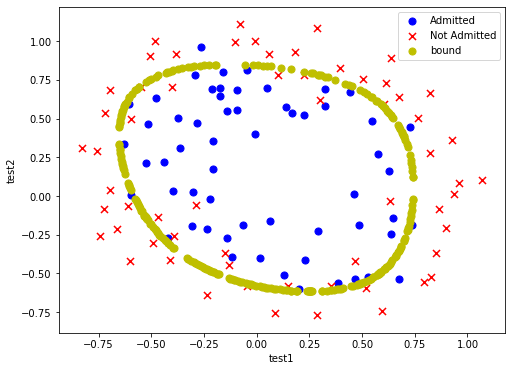

In [133]:
positive = df[df['accepted'].isin([1])]
negative = df[df['accepted'].isin([0])]
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Not Admitted')
ax.scatter(t1, t2, s=50, c='y', marker='o', label='bound')
ax.legend()
ax.set_xlabel('test1')
ax.set_ylabel('test2')